<a href="https://colab.research.google.com/github/Habib-human/Sternritter/blob/main/Dengue(exploratory).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Drug Discovery Bioinformatics**

## Installing libraries

In [ ]:
! pip install chembl_webresource_client

     |████████████████████████████████| 55 kB 2.6 MB/s 
     |████████████████████████████████| 636 kB 16.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires itsdangerous<2.0,>=0.24, but you have itsdangerous 2.0.1 which is incompatible.


In [ ]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

##Search for target protein

In [ ]:
target = new_client.target
target_query = target.search('dengue')
targets = pd.DataFrame.from_dict(target_query)
targets.head(10)

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Dengue virus,Dengue virus,15.0,False,CHEMBL613757,[],ORGANISM,12637
1,[],Dengue virus 1,Dengue virus 1,13.0,False,CHEMBL613360,[],ORGANISM,11053
2,[],Dengue virus 2,Dengue virus 2,13.0,False,CHEMBL613966,[],ORGANISM,11060
3,[],Dengue virus 3,Dengue virus 3,13.0,False,CHEMBL612717,[],ORGANISM,11069
4,[],Dengue virus 4,Dengue virus type 4,11.0,False,CHEMBL613728,[],ORGANISM,11070
5,"[{'xref_id': 'P29990', 'xref_name': None, 'xre...",Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,9.0,False,CHEMBL5980,"[{'accession': 'P29990', 'component_descriptio...",SINGLE PROTEIN,31634


In [ ]:
selected_target = targets.target_chembl_id[5]
selected_target

'CHEMBL5980'

In [ ]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [ ]:
df = pd.DataFrame.from_dict(res)

In [ ]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,active,7018430,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,assay format,COc1ccc2nc3cccc(OC)c3nc2c1,None,None,CHEMBL1201862,None,NaN,None,CHEMBL1401841,None,CHEMBL1401841,None,False,http://www.openphacts.org/units/Nanomolar,1128177,>,7,True,>,None,IC50,nM,None,100000.0,CHEMBL5980,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0
1,active,7018431,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,assay format,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,None,None,CHEMBL1201862,None,NaN,None,CHEMBL1608853,None,CHEMBL1608853,None,False,http://www.openphacts.org/units/Nanomolar,1125996,None,7,True,None,None,IC50,nM,None,12310.0,CHEMBL5980,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,12.31
2,active,7018432,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,assay format,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,None,None,CHEMBL1201862,None,NaN,None,CHEMBL1429799,None,CHEMBL1429799,None,False,http://www.openphacts.org/units/Nanomolar,1020363,>,7,True,>,None,IC50,nM,None,100000.0,CHEMBL5980,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0
3,active,7018433,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,assay format,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,None,None,CHEMBL1201862,None,NaN,None,CHEMBL246446,None,CHEMBL246446,None,False,http://www.openphacts.org/units/Nanomolar,1107548,None,7,True,None,None,IC50,nM,None,50970.0,CHEMBL5980,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,50.97
4,active,7018434,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,assay format,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,None,None,CHEMBL1201862,None,NaN,None,CHEMBL1383455,None,CHEMBL1383455,None,False,http://www.openphacts.org/units/Nanomolar,1037080,>,7,True,>,None,IC50,nM,None,100000.0,CHEMBL5980,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,None,20674640,[],CHEMBL4621577,Inhibition of Dengue virus serotype 2 NS2B-NS3...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,None,None,CHEMBL4619777,J Med Chem,2020.0,"{'bei': '9.85', 'le': '0.18', 'lle': '-0.06', ...",CHEMBL4640021,None,CHEMBL4650912,5.89,False,http://www.openphacts.org/units/Nanomolar,3481564,=,1,True,=,None,IC50,nM,None,1300.0,CHEMBL5980,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,1.3
1137,None,20674641,[],CHEMBL4621577,Inhibition of Dengue virus serotype 2 NS2B-NS3...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CCCCCC(=O)N[C@@H](C

In [ ]:
df.to_csv('Melatonin_receptor_1B_bioactivity_data_raw.csv', index=False)

## Preprocessing the data

In [ ]:
df = df[df.standard_value.notna()]
df = df[df.canonical_smiles.notna()]
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,active,7018430,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,assay format,COc1ccc2nc3cccc(OC)c3nc2c1,None,None,CHEMBL1201862,None,NaN,None,CHEMBL1401841,None,CHEMBL1401841,None,False,http://www.openphacts.org/units/Nanomolar,1128177,>,7,True,>,None,IC50,nM,None,100000.0,CHEMBL5980,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0
1,active,7018431,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,assay format,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,None,None,CHEMBL1201862,None,NaN,None,CHEMBL1608853,None,CHEMBL1608853,None,False,http://www.openphacts.org/units/Nanomolar,1125996,None,7,True,None,None,IC50,nM,None,12310.0,CHEMBL5980,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,12.31
2,active,7018432,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,assay format,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,None,None,CHEMBL1201862,None,NaN,None,CHEMBL1429799,None,CHEMBL1429799,None,False,http://www.openphacts.org/units/Nanomolar,1020363,>,7,True,>,None,IC50,nM,None,100000.0,CHEMBL5980,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0
3,active,7018433,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,assay format,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,None,None,CHEMBL1201862,None,NaN,None,CHEMBL246446,None,CHEMBL246446,None,False,http://www.openphacts.org/units/Nanomolar,1107548,None,7,True,None,None,IC50,nM,None,50970.0,CHEMBL5980,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,50.97
4,active,7018434,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,assay format,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,None,None,CHEMBL1201862,None,NaN,None,CHEMBL1383455,None,CHEMBL1383455,None,False,http://www.openphacts.org/units/Nanomolar,1037080,>,7,True,>,None,IC50,nM,None,100000.0,CHEMBL5980,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,None,20674640,[],CHEMBL4621577,Inhibition of Dengue virus serotype 2 NS2B-NS3...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,None,None,CHEMBL4619777,J Med Chem,2020.0,"{'bei': '9.85', 'le': '0.18', 'lle': '-0.06', ...",CHEMBL4640021,None,CHEMBL4650912,5.89,False,http://www.openphacts.org/units/Nanomolar,3481564,=,1,True,=,None,IC50,nM,None,1300.0,CHEMBL5980,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,1.3
1137,None,20674641,[],CHEMBL4621577,Inhibition of Dengue virus serotype 2 NS2B-NS3...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CCCCCC(=O)N[C@@H](C

In [ ]:
len(df.canonical_smiles.unique())

1085

In [ ]:
df_withoutrepeat = df.drop_duplicates(['canonical_smiles'])
df_withoutrepeat

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,active,7018430,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,assay format,COc1ccc2nc3cccc(OC)c3nc2c1,None,None,CHEMBL1201862,None,NaN,None,CHEMBL1401841,None,CHEMBL1401841,None,False,http://www.openphacts.org/units/Nanomolar,1128177,>,7,True,>,None,IC50,nM,None,100000.0,CHEMBL5980,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0
1,active,7018431,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,assay format,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,None,None,CHEMBL1201862,None,NaN,None,CHEMBL1608853,None,CHEMBL1608853,None,False,http://www.openphacts.org/units/Nanomolar,1125996,None,7,True,None,None,IC50,nM,None,12310.0,CHEMBL5980,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,12.31
2,active,7018432,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,assay format,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,None,None,CHEMBL1201862,None,NaN,None,CHEMBL1429799,None,CHEMBL1429799,None,False,http://www.openphacts.org/units/Nanomolar,1020363,>,7,True,>,None,IC50,nM,None,100000.0,CHEMBL5980,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0
3,active,7018433,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,assay format,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,None,None,CHEMBL1201862,None,NaN,None,CHEMBL246446,None,CHEMBL246446,None,False,http://www.openphacts.org/units/Nanomolar,1107548,None,7,True,None,None,IC50,nM,None,50970.0,CHEMBL5980,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,50.97
4,active,7018434,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,assay format,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,None,None,CHEMBL1201862,None,NaN,None,CHEMBL1383455,None,CHEMBL1383455,None,False,http://www.openphacts.org/units/Nanomolar,1037080,>,7,True,>,None,IC50,nM,None,100000.0,CHEMBL5980,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,None,20674640,[],CHEMBL4621577,Inhibition of Dengue virus serotype 2 NS2B-NS3...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,None,None,CHEMBL4619777,J Med Chem,2020.0,"{'bei': '9.85', 'le': '0.18', 'lle': '-0.06', ...",CHEMBL4640021,None,CHEMBL4650912,5.89,False,http://www.openphacts.org/units/Nanomolar,3481564,=,1,True,=,None,IC50,nM,None,1300.0,CHEMBL5980,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,1.3
1137,None,20674641,[],CHEMBL4621577,Inhibition of Dengue virus serotype 2 NS2B-NS3...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CCCCCC(=O)N[C@@H](C

In [ ]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df_modified = df_withoutrepeat[selection]
df_modified

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,100000.0
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,12310.0
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,100000.0
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,50970.0
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,100000.0
...,...,...,...
1136,CHEMBL4640021,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,1300.0
1137,CHEMBL4642885,CCCCCC(=O)N[C@@H](C(=O)NCc1ccc(CN)cc1)c1ccc(OC...,3100.0
1138,CHEMBL4636584,N=C(N)NCc1ccc(CNC(=O)[C@H](NC(=O)c2ccc(Oc3cccc...,2500.0
1139,CHEMBL4633312,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,540.0


In [ ]:
df_modified.to_csv('Melatonin_receptor_1B_bioactivity_data_preprocessed.csv', index=False)

In [ ]:
df_labelled = pd.read_csv('Melatonin_receptor_1B_bioactivity_data_preprocessed.csv')

In [ ]:
df_labelled

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,100000.0
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,12310.0
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,100000.0
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,50970.0
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,100000.0
...,...,...,...
1080,CHEMBL4640021,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,1300.0
1081,CHEMBL4642885,CCCCCC(=O)N[C@@H](C(=O)NCc1ccc(CN)cc1)c1ccc(OC...,3100.0
1082,CHEMBL4636584,N=C(N)NCc1ccc(CNC(=O)[C@H](NC(=O)c2ccc(Oc3cccc...,2500.0
1083,CHEMBL4633312,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,540.0


In [ ]:
bioactivity_threshold = []
for i in df_labelled.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [ ]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df_class = pd.concat([df_labelled, bioactivity_class], axis=1)
df_class

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,100000.0,inactive
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,12310.0,inactive
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,100000.0,inactive
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,50970.0,inactive
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,100000.0,inactive
...,...,...,...,...
1080,CHEMBL4640021,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,1300.0,intermediate
1081,CHEMBL4642885,CCCCCC(=O)N[C@@H](C(=O)NCc1ccc(CN)cc1)c1ccc(OC...,3100.0,intermediate
1082,CHEMBL4636584,N=C(N)NCc1ccc(CNC(=O)[C@H](NC(=O)c2ccc(Oc3cccc...,2500.0,intermediate
1083,CHEMBL4633312,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,540.0,active


In [ ]:
df_class.to_csv('Melatonin_receptor_1B_bioactivity_data_curated.csv', index=False)

In [ ]:
! zip Melatonin_receptor_1B.zip *.csv

  adding: Melatonin_receptor_1B_bioactivity_data_curated.csv (deflated 76%)
  adding: Melatonin_receptor_1B_bioactivity_data_preprocessed.csv (deflated 74%)
  adding: Melatonin_receptor_1B_bioactivity_data_raw.csv (deflated 92%)


In [ ]:
! ls -l

total 952
-rw-r--r-- 1 root root  93136 Oct  6 08:55 Melatonin_receptor_1B_bioactivity_data_curated.csv
-rw-r--r-- 1 root root  82977 Oct  6 08:55 Melatonin_receptor_1B_bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root 690498 Oct  6 08:55 Melatonin_receptor_1B_bioactivity_data_raw.csv
-rw-r--r-- 1 root root  96018 Oct  6 08:55 Melatonin_receptor_1B.zip
drwxr-xr-x 1 root root   4096 Sep 30 17:12 sample_data


# **Exploratory analysis**

### **INSTALLING CONDA AND RDKIT**

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-10-06 08:55:20--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   127MB/s    in 0.6s    

2021-10-06 08:55:20 (127 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b64

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('Melatonin_receptor_1B_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,100000.0,inactive
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,12310.0,inactive
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,100000.0,inactive
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,50970.0,inactive
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,100000.0,inactive
...,...,...,...,...
1080,CHEMBL4640021,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,1300.0,intermediate
1081,CHEMBL4642885,CCCCCC(=O)N[C@@H](C(=O)NCc1ccc(CN)cc1)c1ccc(OC...,3100.0,intermediate
1082,CHEMBL4636584,N=C(N)NCc1ccc(CNC(=O)[C@H](NC(=O)c2ccc(Oc3cccc...,2500.0,intermediate
1083,CHEMBL4633312,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,540.0,active


In [ ]:
df_no_canonical_smiles = df.drop(columns='canonical_smiles')
df_no_canonical_smiles

,molecule_chembl_id,standard_value,class
0,CHEMBL1401841,100000.0,inactive
1,CHEMBL1608853,12310.0,inactive
2,CHEMBL1429799,100000.0,inactive
3,CHEMBL246446,50970.0,inactive
4,CHEMBL1383455,100000.0,inactive
...,...,...,...
1080,CHEMBL4640021,1300.0,intermediate
1081,CHEMBL4642885,3100.0,intermediate
1082,CHEMBL4636584,2500.0,intermediate
1083,CHEMBL4633312,540.0,active


In [ ]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [ ]:
df_clean_smiles = pd.concat([df_no_canonical_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL1401841,100000.0,inactive,COc1ccc2nc3cccc(OC)c3nc2c1
1,CHEMBL1608853,12310.0,inactive,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O
2,CHEMBL1429799,100000.0,inactive,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...
3,CHEMBL246446,50970.0,inactive,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1
4,CHEMBL1383455,100000.0,inactive,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...
...,...,...,...,...
1080,CHEMBL4640021,1300.0,intermediate,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...
1081,CHEMBL4642885,3100.0,intermediate,CCCCCC(=O)N[C@@H](C(=O)NCc1ccc(CN)cc1)c1ccc(OC...
1082,CHEMBL4636584,2500.0,intermediate,N=C(N)NCc1ccc(CNC(=O)[C@H](NC(=O)c2ccc(Oc3cccc...
1083,CHEMBL4633312,540.0,active,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...


## **Calculate Lipinski Descriptors**

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [ ]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,240.262,2.80020,0.0,4.0
1,268.224,2.44040,1.0,4.0
2,407.426,1.38560,1.0,5.0
3,306.277,3.84800,1.0,5.0
4,372.772,2.36698,0.0,8.0
...,...,...,...,...
1080,597.719,5.95437,5.0,4.0
1081,542.507,6.08510,3.0,4.0
1082,682.608,7.13527,5.0,5.0
1083,666.609,7.26117,5.0,4.0


In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,100000.0,inactive,240.262,2.80020,0.0,4.0
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,12310.0,inactive,268.224,2.44040,1.0,4.0
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,100000.0,inactive,407.426,1.38560,1.0,5.0
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,50970.0,inactive,306.277,3.84800,1.0,5.0
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,100000.0,inactive,372.772,2.36698,0.0,8.0
...,...,...,...,...,...,...,...,...
1080,CHEMBL4640021,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,1300.0,intermediate,597.719,5.95437,5.0,4.0
1081,CHEMBL4642885,CCCCCC(=O)N[C@@H](C(=O)NCc1ccc(CN)cc1)c1ccc(OC...,3100.0,intermediate,542.507,6.08510,3.0,4.0
1082,CHEMBL4636584,N=C(N)NCc1ccc(CNC(=O)[C@H](NC(=O)c2ccc(Oc3cccc...,2500.0,intermediate,682.608,7.13527,5.0,5.0
1083,CHEMBL4633312,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,540.0,active,666.609,7.26117,5.0,4.0


##**Convert IC50 to PIC50**

In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [ ]:
df_combined.standard_value.describe()

count      1085.000000
mean      50263.244240
std       31041.570728
min         400.000000
25%       26280.000000
50%       43420.000000
75%       75370.000000
max      121900.000000
Name: standard_value, dtype: float64

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [ ]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,240.262,2.80020,0.0,4.0,100000.0
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,268.224,2.44040,1.0,4.0,12310.0
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,407.426,1.38560,1.0,5.0,100000.0
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,306.277,3.84800,1.0,5.0,50970.0
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,372.772,2.36698,0.0,8.0,100000.0
...,...,...,...,...,...,...,...,...
1080,CHEMBL4640021,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,intermediate,597.719,5.95437,5.0,4.0,1300.0
1081,CHEMBL4642885,CCCCCC(=O)N[C@@H](C(=O)NCc1ccc(CN)cc1)c1ccc(OC...,intermediate,542.507,6.08510,3.0,4.0,3100.0
1082,CHEMBL4636584,N=C(N)NCc1ccc(CNC(=O)[C@H](NC(=O)c2ccc(Oc3cccc...,intermediate,682.608,7.13527,5.0,5.0,2500.0
1083,CHEMBL4633312,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,active,666.609,7.26117,5.0,4.0,540.0


In [ ]:
df_norm.standard_value_norm.describe()

count      1085.000000
mean      50263.244240
std       31041.570728
min         400.000000
25%       26280.000000
50%       43420.000000
75%       75370.000000
max      121900.000000
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,240.262,2.80020,0.0,4.0,4.000000
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,268.224,2.44040,1.0,4.0,4.909742
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,407.426,1.38560,1.0,5.0,4.000000
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,306.277,3.84800,1.0,5.0,4.292685
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,372.772,2.36698,0.0,8.0,4.000000
...,...,...,...,...,...,...,...,...
1080,CHEMBL4640021,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,intermediate,597.719,5.95437,5.0,4.0,5.886057
1081,CHEMBL4642885,CCCCCC(=O)N[C@@H](C(=O)NCc1ccc(CN)cc1)c1ccc(OC...,intermediate,542.507,6.08510,3.0,4.0,5.508638
1082,CHEMBL4636584,N=C(N)NCc1ccc(CNC(=O)[C@H](NC(=O)c2ccc(Oc3cccc...,intermediate,682.608,7.13527,5.0,5.0,5.602060
1083,CHEMBL4633312,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,active,666.609,7.26117,5.0,4.0,6.267606


In [ ]:
df_final.pIC50.describe()

count    1085.000000
mean        4.426007
std         0.398209
min         3.913996
25%         4.122801
50%         4.362310
75%         4.580375
max         6.397940
Name: pIC50, dtype: float64

In [ ]:
df_final.to_csv('Melatonin_receptor_1B_bioactivity_data_3class_pIC50.csv')

In [ ]:
df_class_no_intermediate = df_final[df_final['class'] != 'intermediate']
df_class_no_intermediate

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,240.262,2.80020,0.0,4.0,4.000000
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,268.224,2.44040,1.0,4.0,4.909742
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,407.426,1.38560,1.0,5.0,4.000000
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,306.277,3.84800,1.0,5.0,4.292685
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,372.772,2.36698,0.0,8.0,4.000000
...,...,...,...,...,...,...,...,...
1060,CHEMBL3335490,N=C(N)NCCC[C@H](NC(=O)c1ccccc1)C(=O)N[C@@H](CC...,inactive,462.555,-1.73643,8.0,6.0,4.638272
1063,CHEMBL4635643,CCCCCC(=O)N[C@H](C(=O)NCc1ccc(NC(=N)N)cc1)c1cc...,inactive,526.641,4.49665,5.0,5.0,4.397940
1066,CHEMBL4638581,CCCCCC(=O)N[C@H](C(=O)NCc1ccc(NC(=N)N)cc1)c1cc...,inactive,557.739,5.92247,5.0,4.0,4.886057
1079,CHEMBL4642710,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)c2ccccc2-c2cc...,inactive,583.692,6.02547,5.0,4.0,4.619789


In [ ]:
df_class_no_intermediate.to_csv('Melatonin_receptor_1B_bioactivity_data_2class_pIC50.csv')

##**Exploratory Data Analysis by Lipinski descriptors**

### Import library

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### Frequency plot of the data with two activity class

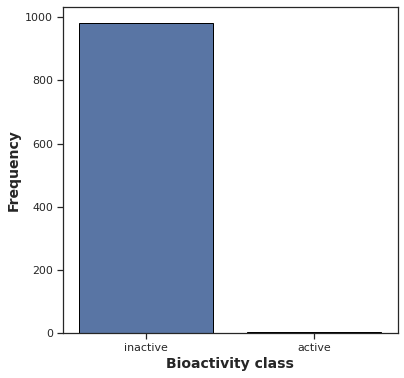

In [ ]:
plt.figure(figsize=(6, 6))

sns.countplot(x='class', data=df_class_no_intermediate, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### Scatter plot of MW versus LogP

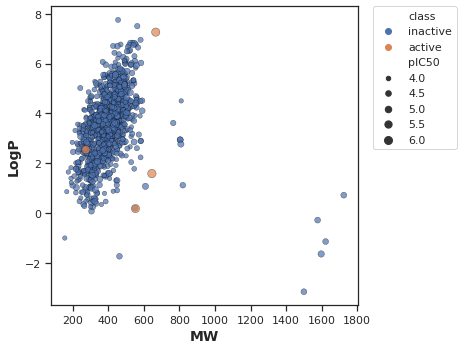

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_class_no_intermediate, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

## Box plots

### pIC50 value

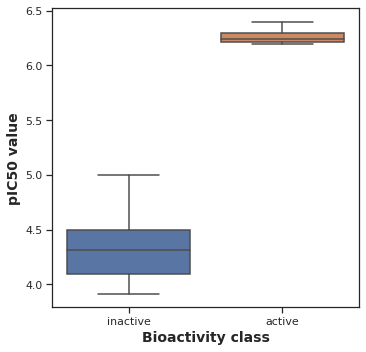

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_class_no_intermediate)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

### **Mann-Whitney U Test**

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_class_no_intermediate[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_class_no_intermediate[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,0.000267,0.05,Different distribution (reject H0)


### MW

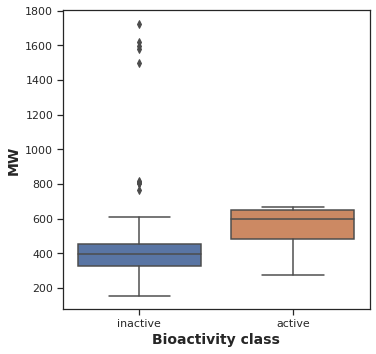

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_class_no_intermediate)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,958.0,0.038447,0.05,Different distribution (reject H0)


### LogP

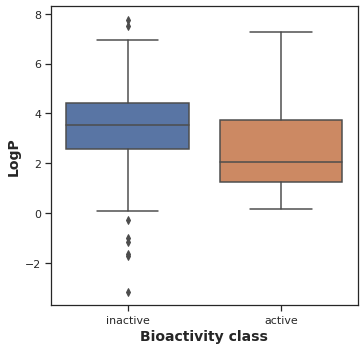

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_class_no_intermediate)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,1304.0,0.122968,0.05,Same distribution (fail to reject H0)


### Number of hydrogen donor

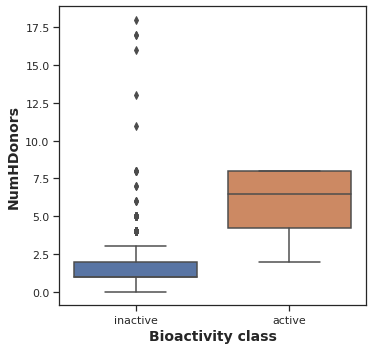

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_class_no_intermediate)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,372.5,0.001821,0.05,Different distribution (reject H0)


### Number of hydrogen acceptors

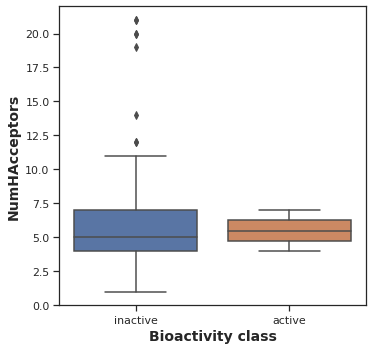

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_class_no_intermediate)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,1887.5,0.446047,0.05,Same distribution (fail to reject H0)


# **Results**

# zip files

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

  adding: Melatonin_receptor_1B_bioactivity_data_preprocessed.csv (deflated 74%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: Melatonin_receptor_1B_bioactivity_data_3class_pIC50.csv (deflated 70%)
  adding: Melatonin_receptor_1B_bioactivity_data_2class_pIC50.csv (deflated 70%)
  adding: plot_NumHDonors.pdf (deflated 39%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: plot_ic50.pdf (deflated 38%)
  adding: plot_MW.pdf (deflated 38%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: Melatonin_receptor_1B_bioactivity_data_curated.csv (deflated 76%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: plot_MW_vs_LogP.pdf (deflated 3%)
  adding: Melatonin_receptor_1B_bioactivity_data_raw.csv (deflated 92%)
  adding: mannwhitneyu_LogP.csv (deflated 7%)


# Descriptor Calculation

## Download PaDEL-Descriptor

In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2021-10-06 08:56:39--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2021-10-06 08:56:40--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   163MB/s    in 0.2s    

2021-10-06 08:56:41 (163 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2021-10-06 08:56:41--  https://github

In [ ]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [ ]:
import pandas as pd
df_for_analysis = pd.read_csv('Melatonin_receptor_1B_bioactivity_data_3class_pIC50.csv')
df_for_analysis

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,240.262,2.80020,0.0,4.0,4.000000
1,1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,268.224,2.44040,1.0,4.0,4.909742
2,2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,407.426,1.38560,1.0,5.0,4.000000
3,3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,306.277,3.84800,1.0,5.0,4.292685
4,4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,372.772,2.36698,0.0,8.0,4.000000
...,...,...,...,...,...,...,...,...,...
1080,1080,CHEMBL4640021,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,intermediate,597.719,5.95437,5.0,4.0,5.886057
1081,1081,CHEMBL4642885,CCCCCC(=O)N[C@@H](C(=O)NCc1ccc(CN)cc1)c1ccc(OC...,intermediate,542.507,6.08510,3.0,4.0,5.508638
1082,1082,CHEMBL4636584,N=C(N)NCc1ccc(CNC(=O)[C@H](NC(=O)c2ccc(Oc3cccc...,intermediate,682.608,7.13527,5.0,5.0,5.602060
1083,1083,CHEMBL4633312,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,active,666.609,7.26117,5.0,4.0,6.267606


In [ ]:
selection = ['canonical_smiles','molecule_chembl_id']
df_for_analysis_selection = df_for_analysis[selection]
df_for_analysis_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
! cat molecule.smi | head -5

COc1ccc2nc3cccc(OC)c3nc2c1	CHEMBL1401841
O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O	CHEMBL1608853
O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CCOCC1	CHEMBL1429799
O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1	CHEMBL246446
CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(Cl)c1=O	CHEMBL1383455


In [ ]:
! cat molecule.smi | wc -l

1085


# Calculate fingerprints

## Calculate PaDEL descriptors

In [ ]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! bash padel.sh

Processing CHEMBL1401841 in molecule.smi (1/1085). 
Processing CHEMBL1608853 in molecule.smi (2/1085). 
Processing CHEMBL1429799 in molecule.smi (3/1085). Average speed: 3.06 s/mol.
Processing CHEMBL246446 in molecule.smi (4/1085). Average speed: 1.59 s/mol.
Processing CHEMBL1383455 in molecule.smi (5/1085). Average speed: 1.51 s/mol.
Processing CHEMBL1485159 in molecule.smi (6/1085). Average speed: 1.18 s/mol.
Processing CHEMBL1383611 in molecule.smi (7/1085). Average speed: 0.89 s/mol.
Processing CHEMBL1730401 in molecule.smi (8/1085). Average speed: 0.89 s/mol.
Processing CHEMBL1440986 in molecule.smi (9/1085). Average speed: 0.83 s/mol.
Processing CHEMBL3194058 in molecule.smi (10/1085). Average speed: 0.74 s/mol.
Processing CHEMBL66953 in molecule.smi (11/1085). Average speed: 0.75 s/mol.
Processing CHEMBL1586109 in molecule.smi (12/1085). Average speed: 0.70 s/mol.
Processing CHEMBL3194143 in molecule.smi (13/1085). Average speed: 0.66 s/mol.
Processing CHEMBL1318358 in molecule.

In [ ]:
! ls -l

total 112164
-rw-r--r-- 1 root root  1940430 Oct  6 09:00 descriptors_output.csv
drwxr-xr-x 3 root root     4096 Oct  6 08:56 __MACOSX
-rw-r--r-- 1 root root      122 Oct  6 08:56 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root      118 Oct  6 08:56 mannwhitneyu_MW.csv
-rw-r--r-- 1 root root      132 Oct  6 08:56 mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      127 Oct  6 08:56 mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 root root      121 Oct  6 08:56 mannwhitneyu_pIC50.csv
-rw-r--r-- 1 root root   135903 Oct  6 08:56 Melatonin_receptor_1B_bioactivity_data_2class_pIC50.csv
-rw-r--r-- 1 root root   151656 Oct  6 08:56 Melatonin_receptor_1B_bioactivity_data_3class_pIC50.csv
-rw-r--r-- 1 root root    93136 Oct  6 08:55 Melatonin_receptor_1B_bioactivity_data_curated.csv
-rw-r--r-- 1 root root    82977 Oct  6 08:55 Melatonin_receptor_1B_bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root   690498 Oct  6 08:55 Melatonin_receptor_1B_bioactivity_data_raw.csv
-rw-r--r-- 1 root root   

## X data matrix

In [ ]:
df_analysis_X = pd.read_csv('descriptors_output.csv')
df_analysis_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL1401841,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,CHEMBL1608853,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CHEMBL1429799,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,CHEMBL246446,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,CHEMBL1383455,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,CHEMBL4640021,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1081,CHEMBL4642885,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1082,CHEMBL4636584,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1083,CHEMBL4633312,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_analysis_X = df_analysis_X.drop(columns=['Name'])
df_analysis_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1081,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1082,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1083,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Y data matrix

## Convert IC50 to pIC50

In [ ]:
df_analysis_Y = df_for_analysis['pIC50']
df_analysis_Y

0       4.000000
1       4.909742
2       4.000000
3       4.292685
4       4.000000
          ...   
1080    5.886057
1081    5.508638
1082    5.602060
1083    6.267606
1084    5.200659
Name: pIC50, Length: 1085, dtype: float64

# Combining X and Y variable

In [ ]:
dataset = pd.concat([df_analysis_X,df_analysis_Y], axis=1)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.000000
1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.909742
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.000000
3,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.292685
4,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.886057
1081,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.508638
1082,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.602060
1083,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.267606


In [ ]:
dataset.to_csv('Melatonin_receptor_1B_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

# **Regression Models with Random Forest**

## import libraries

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
dataframe = pd.read_csv('Melatonin_receptor_1B_bioactivity_data_3class_pIC50_pubchem_fp.csv')

## input features

In [ ]:
X = dataframe.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1081,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1082,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1083,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = dataframe.pIC50
Y

0       4.000000
1       4.909742
2       4.000000
3       4.292685
4       4.000000
          ...   
1080    5.886057
1081    5.508638
1082    5.602060
1083    6.267606
1084    5.200659
Name: pIC50, Length: 1085, dtype: float64

In [ ]:
X.shape
Y.shape

(1085,)

## Removing low variance features

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

(1085, 163)

## splitting data in 80 and 20 ratio

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape, Y_train.shape

((868, 163), (868,))

In [ ]:
X_test.shape, Y_test.shape

((217, 163), (217,))

## Regression Model using Random Forest

In [ ]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.0491065749712466

In [ ]:
Y_pred = model.predict(X_test)

##  Experimental vs Predicted pIC50 Values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

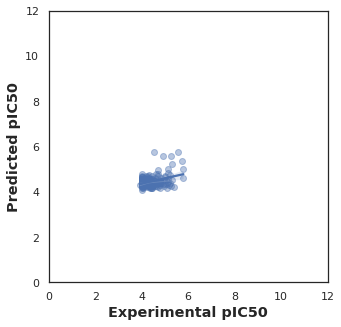

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

# **Comparing Regressors**

In [ ]:
! pip install lazypredict

     |████████████████████████████████| 10.1 MB 6.6 MB/s 
     |████████████████████████████████| 127.6 MB 20 kB/s 
     |████████████████████████████████| 25.9 MB 1.0 kB/s 
     |████████████████████████████████| 269 kB 59.0 MB/s 
     |████████████████████████████████| 82 kB 1.1 MB/s 
     |████████████████████████████████| 6.8 MB 11.2 MB/s 
     |████████████████████████████████| 72 kB 936 kB/s 
     |████████████████████████████████| 248 kB 55.1 MB/s 
     |████████████████████████████████| 14.5 MB 8.0 kB/s 
     |████████████████████████████████| 1.2 MB 55.8 MB/s 
     |████████████████████████████████| 302 kB 40.0 MB/s 
     |████████████████████████████████| 40 kB 5.2 MB/s 
     |████████████████████████████████| 53 kB 2.3 MB/s 
     |████████████████████████████████| 97 kB 6.6 MB/s 
     |████████████████████████████████| 51 kB 240 kB/s 
     |████████████████████████████████| 67 kB 5.5 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=393

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


#  Compare ML algorithms

In [ ]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 92%|█████████▏| 35/38 [00:22<00:01,  2.28it/s]

[09:01:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 38/38 [00:00<00:00, 233016.89it/s]


In [ ]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreeRegressor,0.93,0.94,0.10,0.05
DecisionTreeRegressor,0.93,0.94,0.10,0.10
ExtraTreesRegressor,0.93,0.94,0.10,2.06
GaussianProcessRegressor,0.93,0.94,0.10,0.32
MLPRegressor,0.86,0.89,0.13,2.01
RandomForestRegressor,0.80,0.84,0.16,1.62
HistGradientBoostingRegressor,0.75,0.80,0.18,2.14
LGBMRegressor,0.75,0.80,0.18,0.23
BaggingRegressor,0.75,0.80,0.18,0.19


In [ ]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,


# Visualiztion

[(0.0, 1.0)]

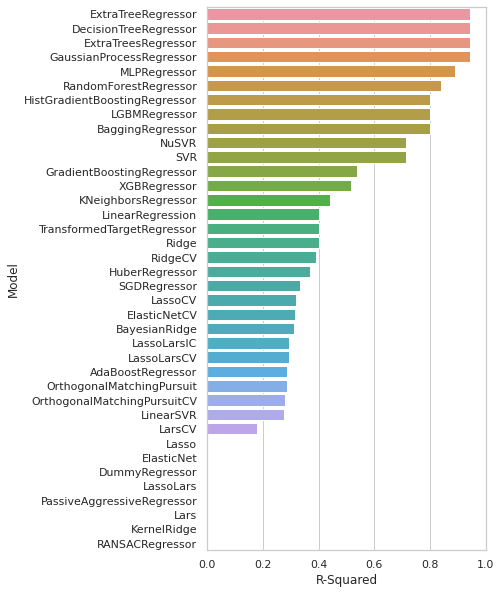

In [ ]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

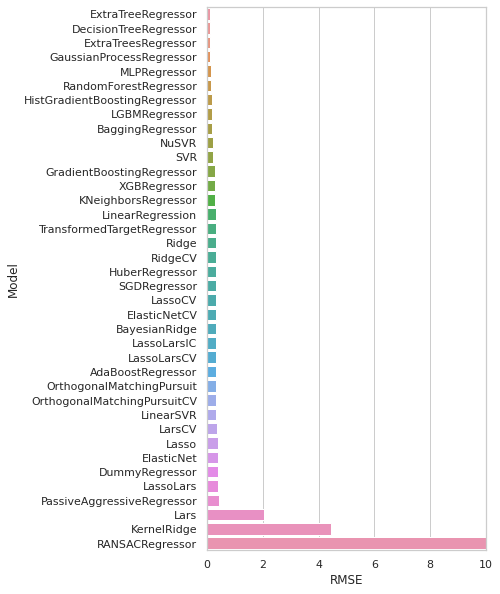

In [ ]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 2.0)]

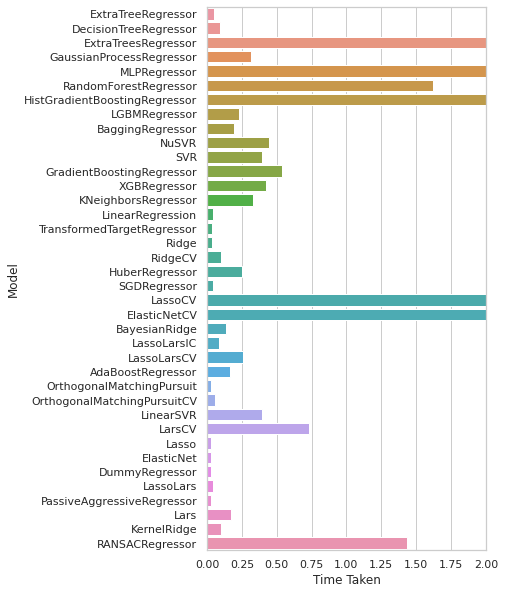

In [ ]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 2))